In [2]:
%load_ext autoreload
%autoreload 2

In [34]:
import numpy as np
import pandas as pd
from utils import df_filter_times,Position,Heap
from matplotlib import pyplot as plt

In [4]:
df_all = pd.read_csv("./data/1m-10d.csv",parse_dates=["datetime"])

In [5]:
df_market = df_filter_times(df_all)

In [39]:
df = df_market.groupby('name').get_group('AAPL').reset_index()
len(df)

3910

In [48]:
heap_price = Heap(True)
heap_exp = Heap(True)

daymax = df['datetime'].max()

expired = []
filled = []

num_positions = []

# Loop through the DataFrame and compare consecutive rows
for i in range(1, len(df)):
    row = df.iloc[i]

    # handle expirations first
    while True:
        curr: Position = heap_exp.peek()
        if curr is None:
            break
        elif curr.filltype is not None:
            heap_exp.pop()
        elif row['datetime'] > curr.sellby:
            heap_exp.pop()
            curr.fillprice = row['high']
            curr.filltype = 'expire'
            expired.append(curr)
        else:
            break
   
    # handle limit sells next
    while True:
        curr: Position = heap_price.peek()
        if curr is None:
            break
        elif curr.filltype is not None:
            heap_price.pop()
        elif curr.minprice < row['high']:
            heap_price.pop()
            curr.fillprice = curr.minprice
            curr.filltype = "limit"
            filled.append(curr)
        else:
            break
    num_positions.append(1+i-len(filled)-len(expired))
    buy = Position(row['close'], row['datetime'],
                   row['datetime']+pd.Timedelta(hours=72), row['close']+0.01)
    heap_price.push(buy, buy.minprice)
    heap_exp.push(buy, buy.sellby)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 5, 4, 5, 5, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 3, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 7, 7, 8, 7, 7, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 9, 10, 9, 10, 10, 10, 11, 11, 10, 11, 10, 11, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 11, 12, 12, 12, 13, 14, 14, 14, 14, 14, 13, 13, 13, 12, 11, 12, 11, 10, 10, 11, 10, 11, 11, 10, 9, 8, 9, 7, 7, 7, 7, 7, 6, 7, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 10, 9, 9, 10, 11, 11, 10, 10, 10, 10, 10, 10, 11, 12, 10, 9, 8, 9, 8, 8, 8, 8, 9, 10, 10, 11, 11, 11, 12, 13, 14, 12, 13, 12, 13, 14, 14, 15, 14, 14, 14, 11, 10, 10, 8, 8, 9, 9, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 7, 7, 8, 8, 8, 9, 1

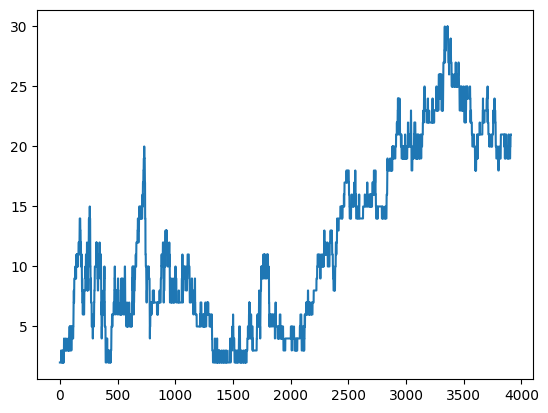

In [49]:
plt.plot(num_positions)
print(num_positions)

In [50]:
len(filled), len(expired), len(df)

(3875, 14, 3910)

In [51]:
for x in filled:
    print(x)
for x in heap_price.heap:
    print(x[1])

Buy 168.69, Minsell 168.7, Fill 168.7 Buytime 2024-04-08 09:31:00-04:00 Sellby 2024-04-11 09:31:00-04:00
Buy 168.53, Minsell 168.54, Fill 168.54 Buytime 2024-04-08 09:32:00-04:00 Sellby 2024-04-11 09:32:00-04:00
Buy 168.534, Minsell 168.54399999999998, Fill 168.54399999999998 Buytime 2024-04-08 09:33:00-04:00 Sellby 2024-04-11 09:33:00-04:00
Buy 168.53, Minsell 168.54, Fill 168.54 Buytime 2024-04-08 09:34:00-04:00 Sellby 2024-04-11 09:34:00-04:00
Buy 168.24, Minsell 168.25, Fill 168.25 Buytime 2024-04-08 09:35:00-04:00 Sellby 2024-04-11 09:35:00-04:00
Buy 168.4, Minsell 168.41, Fill 168.41 Buytime 2024-04-08 09:36:00-04:00 Sellby 2024-04-11 09:36:00-04:00
Buy 168.69, Minsell 168.7, Fill 168.7 Buytime 2024-04-08 09:37:00-04:00 Sellby 2024-04-11 09:37:00-04:00
Buy 168.57, Minsell 168.57999999999998, Fill 168.57999999999998 Buytime 2024-04-08 09:38:00-04:00 Sellby 2024-04-11 09:38:00-04:00
Buy 168.64, Minsell 168.64999999999998, Fill 168.64999999999998 Buytime 2024-04-08 09:39:00-04:00 Se

In [52]:
profs = [0]
for x in expired:
    prof = x.fillprice - x.buyprice
    profs.append(prof)

print(np.mean(profs))

-6.311026666666665


In [53]:
profs = [0]
for x in filled:
    prof = x.fillprice - x.buyprice
    profs.append(prof)

print(np.mean(profs))

0.009997420020630742


In [54]:
profs = [0]
for x in filled + expired:
    prof = x.fillprice - x.buyprice
    profs.append(prof)

print(np.mean(profs))

-0.014374138817489774
